<font size =6>
Проверка полной однородности

Выполнил: Шутов Захар (ММБ-003)

#Введение

Цель работы — проверить гипотезу о полной однородности исследуемого признака
на парах генеральных совокупностей

Выборочные данные представлены в виде объединенной выборки, состоящей из четырех частей, каждая из которых содержит значения исследуемого признака на соответствующей генеральной совокупности. Группирующая переменная, принимающая значения 1, 2, 3, 4, показывает, к какой части относится тот или иной элемент объединенной выборки. Номер выборки и, соответственно, номер генеральной совокупности, определяется значением этой переменной.

Подключаем библиотеки

In [1]:
install.packages("dplyr")
library(dplyr)
install.packages("readxl")
library(readxl)
install.packages("xlsx")
install.packages("sm")
library(sm)
install.packages("nortest")
library(nortest)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’


Warning message in install.packages("xlsx"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsxjars’ had non-zero exit status”
Warning message in install.packages("xlsx"):
“installation of package ‘xlsx’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Installing package into ‘/us

In [2]:
ds0 <- read_xlsx("AD.ds3.xlsx")
head(ds0)

v1        v2         v3         v4         v5          v6        v7        
1  6.059313 -1.8555210 -17.162673  11.044343 -23.3417797 -42.52024  53.133029
2 11.853664 -1.2877461 -26.281267 -21.672478   0.9784497 -19.72256 -45.017433
3  7.770431 -6.6498313 -18.138106  -9.144086  -6.8826825 -50.59306  -7.432258
4  9.634201 18.2956757  -1.251677  -5.454505 -10.4190252 -15.41952   3.636486
5  9.693239 -2.4210789 -10.350603  -9.555780  14.6070573  13.65810  -8.667340
6 11.548443 -0.9830199  -9.820367 -15.575293 -25.9817017 -20.20311 -26.725880
  v8        v9       v10        ⋯ v72       v73        v74         v75       
1 17.829904 15.31252  46.026926 ⋯ 18.143563 -14.173505 -12.9088142 -30.324509
2 19.227115 34.18348  65.385567 ⋯  1.447923  -4.507531  -5.5788553   3.159857
3 18.870878 32.18399 -15.468149 ⋯ 17.018063  -6.249020 -21.0934707 -11.894213
4 14.139482 19.37617  -1.363523 ⋯  5.788373  13.385526  -0.8834297 -28.111708
5 20.476363 27.17903  42.885804 ⋯  4.913177 -16.022962 -20.8642553 -17.932962
6 -5.831976 23.88654  32.776407 ⋯  1.714757  -1.128292 -24.2746103 -14.356669
  v76       v77       v78       v79       v80       G
1 11.314424 35.557165 18.456091  7.427282 -30.38895 1
2 30.422340 34.115070 18.175637  7.389731 -29.03563 3
3 30.611333 -9.326853 11.518727 39.650201 -28.20107 3
4  7.078885 24.275838 23.820348 -2.653444 -26.81064 1
5 20.897679 -5.641990  7.759069 -1.067956 -24.84395 1
6 20.561985 35.140389 22.342715 15.389578 -22.85434 3

С помощью функции factor сделаем тип столбец Factor факторной переменной

In [3]:
ds <- dplyr::select(ds0, Factor = G, s15 = v15, )
head(ds)

Factor s15       
1 1      -12.590658
2 3        3.159857
3 3      -11.894213
4 1      -19.750780
5 1       30.458614
6 3      -14.356669

Используя функцию subset пакета dplyr, создадим переменные sample1, sample2, sample3, sample4, содержащие независимые выборки

In [4]:
Factor <- c(1, 2, 3, 4)
sample1 <- subset(ds, Factor == 1)
head(sample1)

Factor s15       
1 1      -12.590658
2 1      -19.750780
3 1       30.458614
4 1       -8.003394
5 1      -10.216604
6 1       18.543324

In [5]:
sample2 <- subset(ds, Factor == 2)
head(sample2)

Factor s15       
1 2       13.582940
2 2      -17.513253
3 2       21.411915
4 2        9.225568
5 2        7.348046
6 2       -1.820342

In [6]:
sample3 <- subset(ds, Factor == 3)
head(sample3)

Factor s15       
1 3        3.159857
2 3      -11.894213
3 3      -14.356669
4 3       -9.249152
5 3       26.179259
6 3       13.311967

In [7]:
sample4 <- subset(ds, Factor == 4)
head(sample4)

Factor s15      
1 4       7.143925
2 4      18.670766
3 4       8.799249
4 4      11.608173
5 4      11.451613
6 4       6.467330

Выборка равна генеральной совокупности с соответствующим номером

# Предварительный анализ

##Визуализация данных

### Первая выборка

Квантильный график

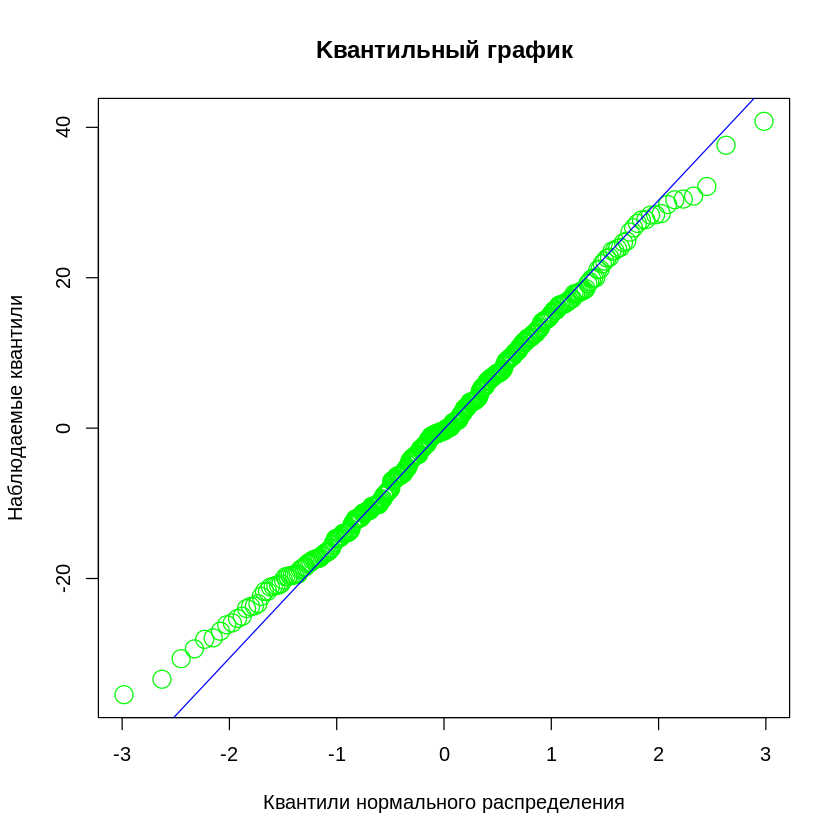

In [8]:
qqnorm(sample1$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample1$s15, col = "blue")

Большинство точек графика распределены вдоль биссектрисы, есть некоторые квантили эмпирического распределения, которые не сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения плотности нормального распределения выборки

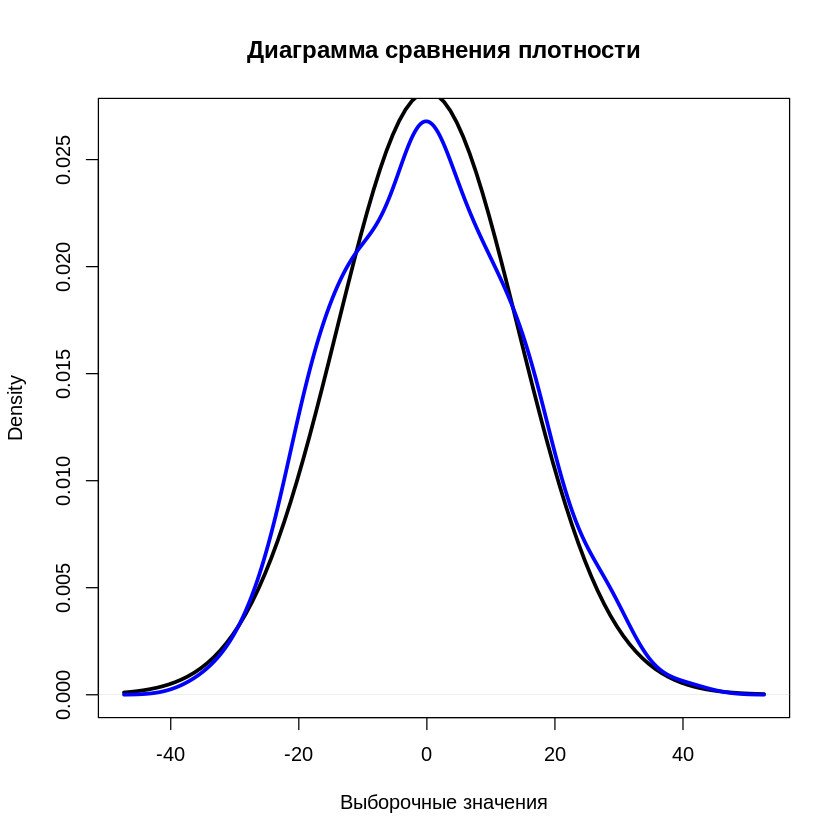

In [9]:
m1 <- mean(sample1$s15)
s1 <- sd(sample1$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample1$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample1$s15),col = "blue", lwd = 3)

График эмпирической плотности, близок к графику плотности нормального распределения и имеет не большие отклонения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

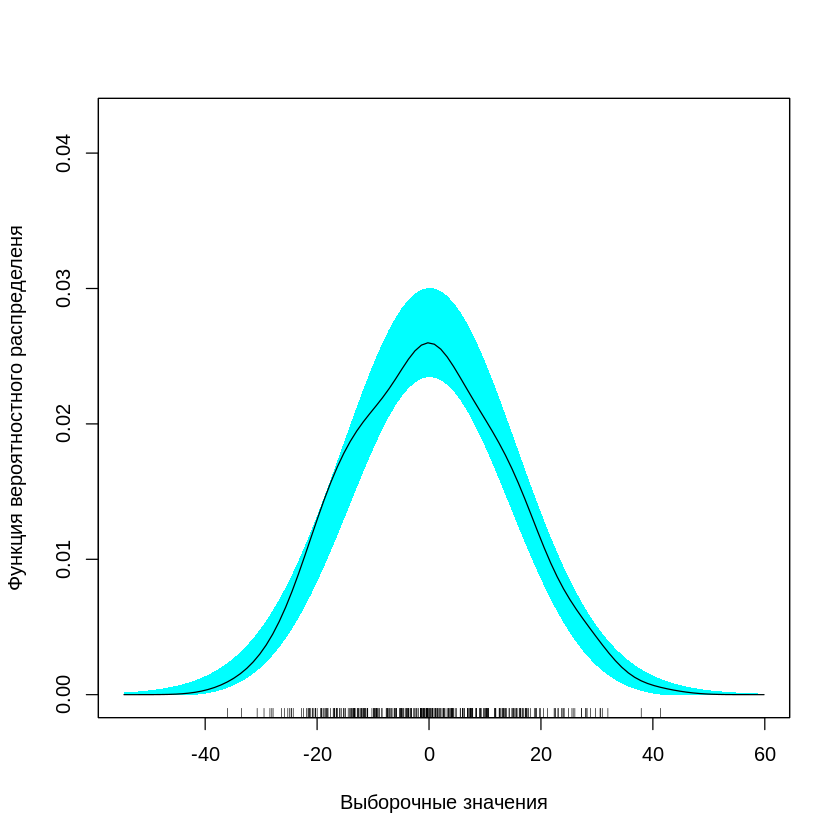

In [10]:
sm.density(sample1$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен в пределах полосы, определяемой нормальным распределением, т.е. график эмпирической плотности схож с графиком плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может подходить для описания исследуемого показателя

### Вторая выборка

Квантильный график

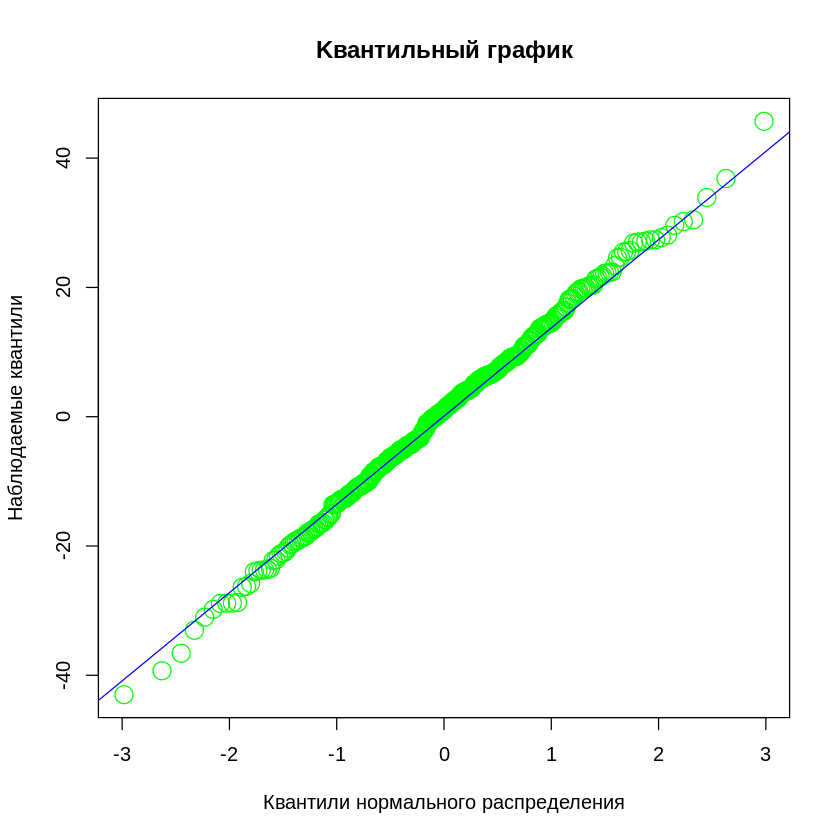

In [11]:
qqnorm(sample2$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample2$s15, col = "blue")

Большинство точек графика распределены вдоль биссектрисы, есть некоторые квантили эмпирического распределения, которые не сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения плотности нормального распределения выборки

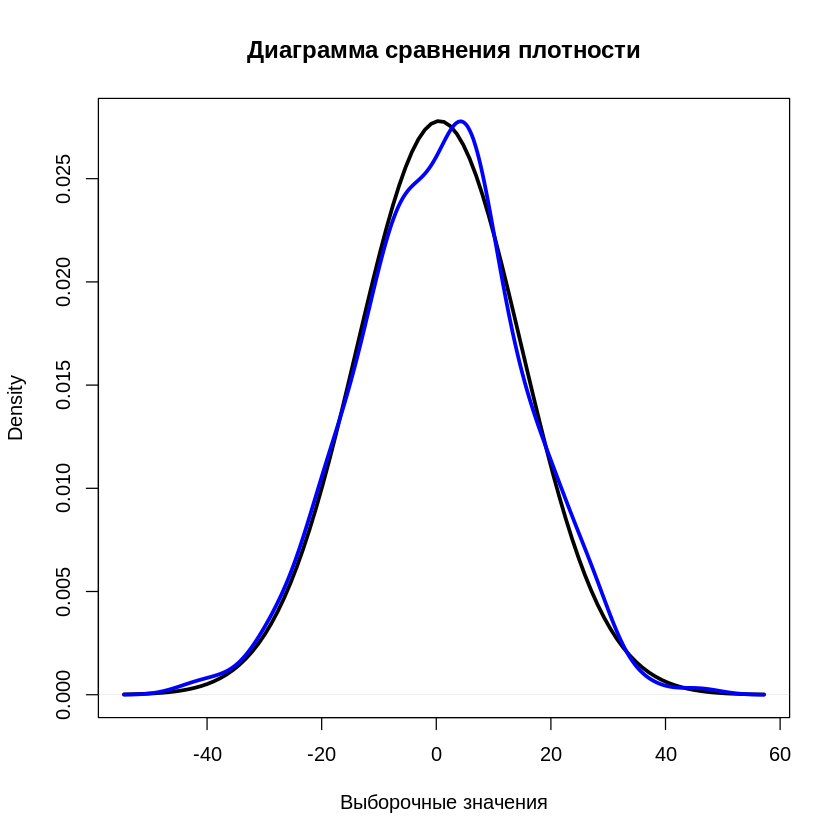

In [12]:
m1 <- mean(sample2$s15)
s1 <- sd(sample2$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample2$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample2$s15),col = "blue", lwd = 3)

График эмпирической плотности, близок к графику плотности нормального распределения и имеет не большие отклонения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

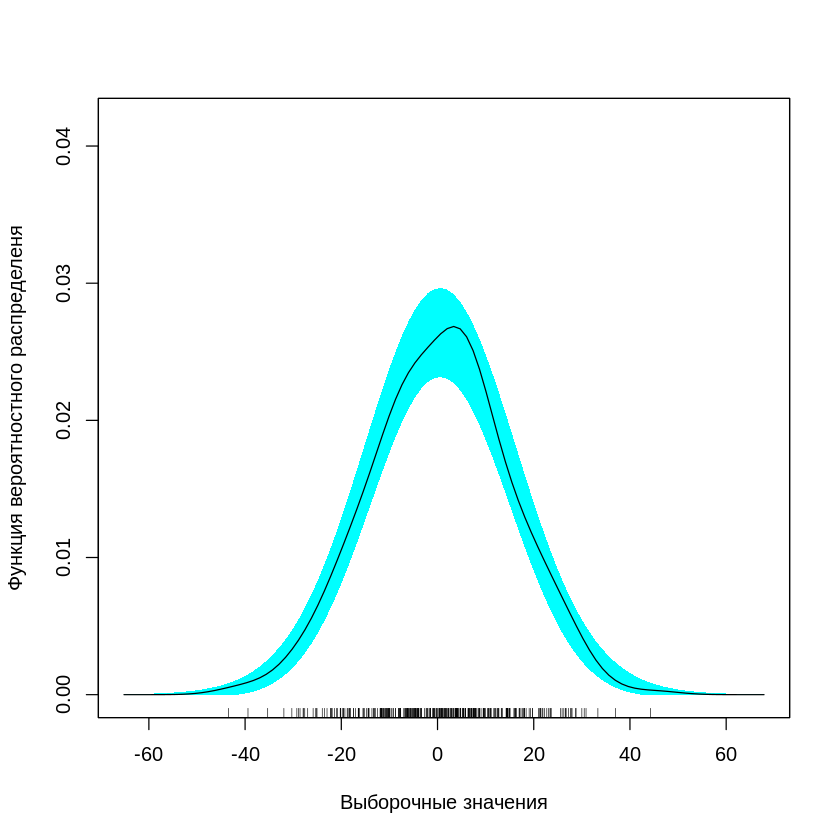

In [13]:
sm.density(sample2$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен в пределах полосы, определяемой нормальным распределением, т.е. график эмпирической плотности схож с графиком плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может подходить для описания исследуемого показателя

### Третья выборка

Квантильный график

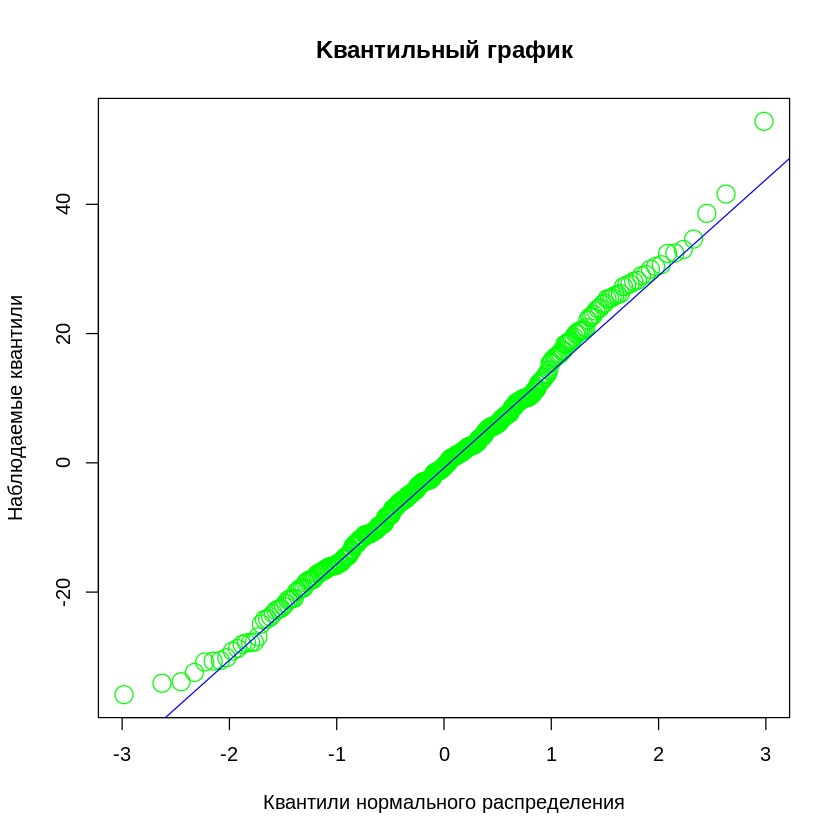

In [14]:
qqnorm(sample3$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample3$s15, col = "blue")

Большинство точек графика распределены вдоль биссектрисы, есть некоторые квантили эмпирического распределения, которые не сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения плотности нормального распределения выборки

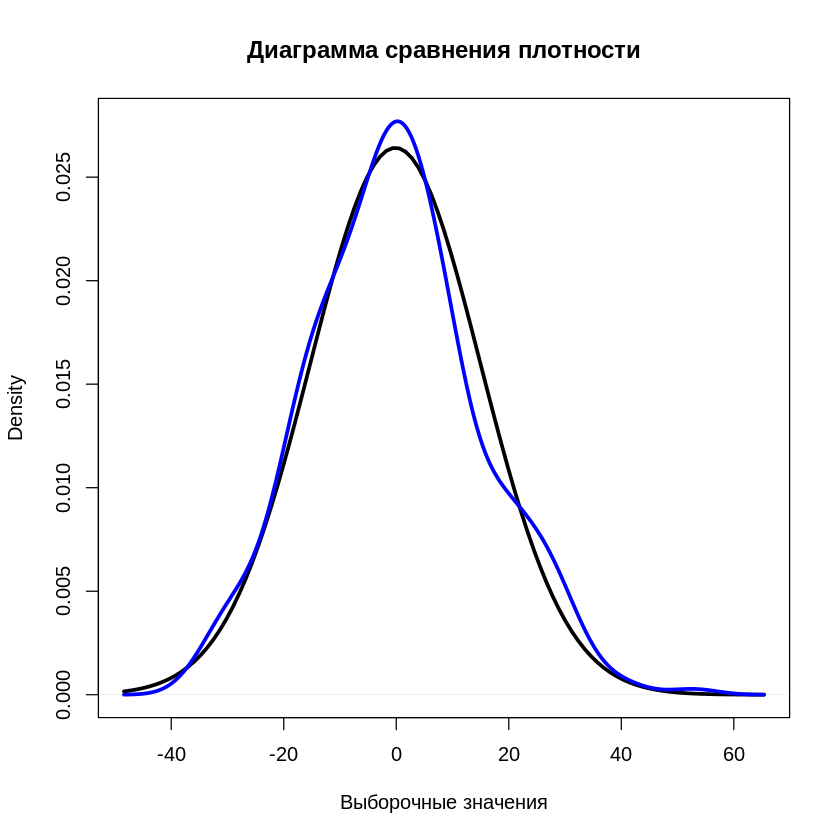

In [15]:
m1 <- mean(sample3$s15)
s1 <- sd(sample3$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample3$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample3$s15),col = "blue", lwd = 3)

График эмпирической плотности, близок к графику плотности нормального распределения и имеет не большие отклонения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

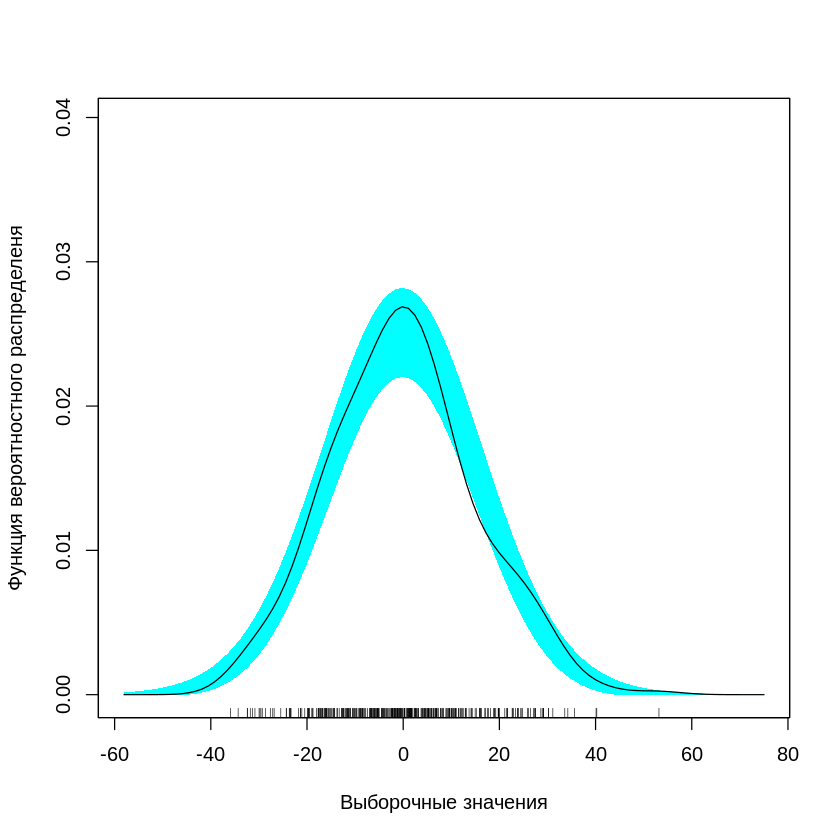

In [16]:
sm.density(sample3$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен в пределах полосы, определяемой нормальным распределением, т.е. график эмпирической плотности схож с графиком плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может подходить для описания исследуемого показателя

### Четвертая выборка

Квантильный график

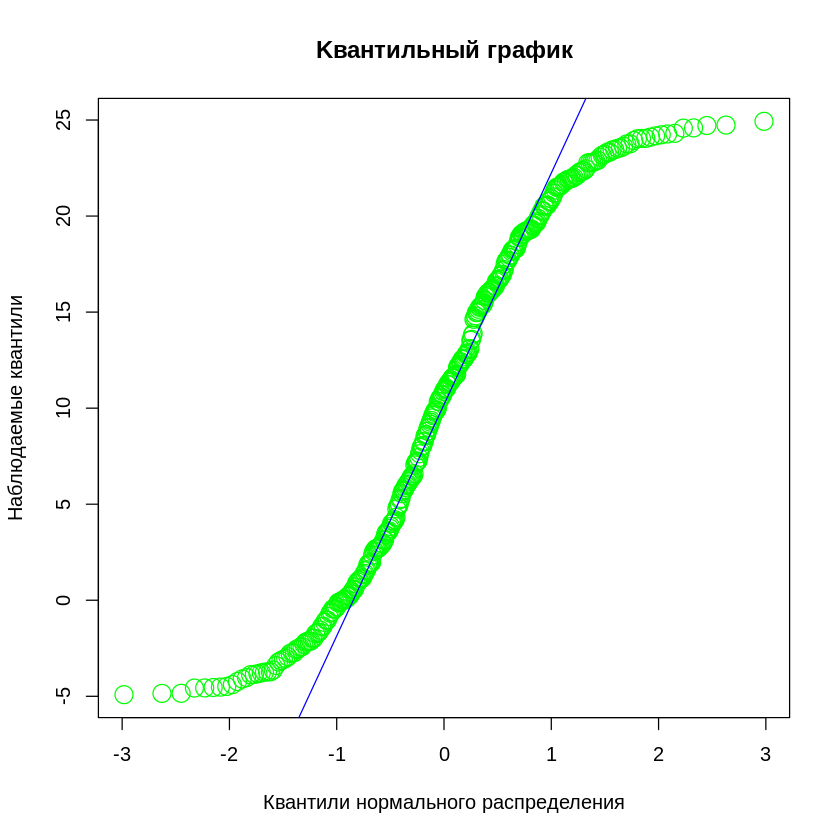

In [17]:
qqnorm(sample4$s15, col = "green", cex = 2, pch = 1, main = "Kвантильный график", xlab = "Квантили нормального распределения", ylab = "Наблюдаемые квантили")
qqline(sample4$s15, col = "blue")

Большинство точек графика распределены не вдоль биссектрисы, т.е. квантили эмпирического распределения сильно отличаются от квантилей нормального распределения. Поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может не подходить

Диаграмма сравнения плотности нормального распределения выборки

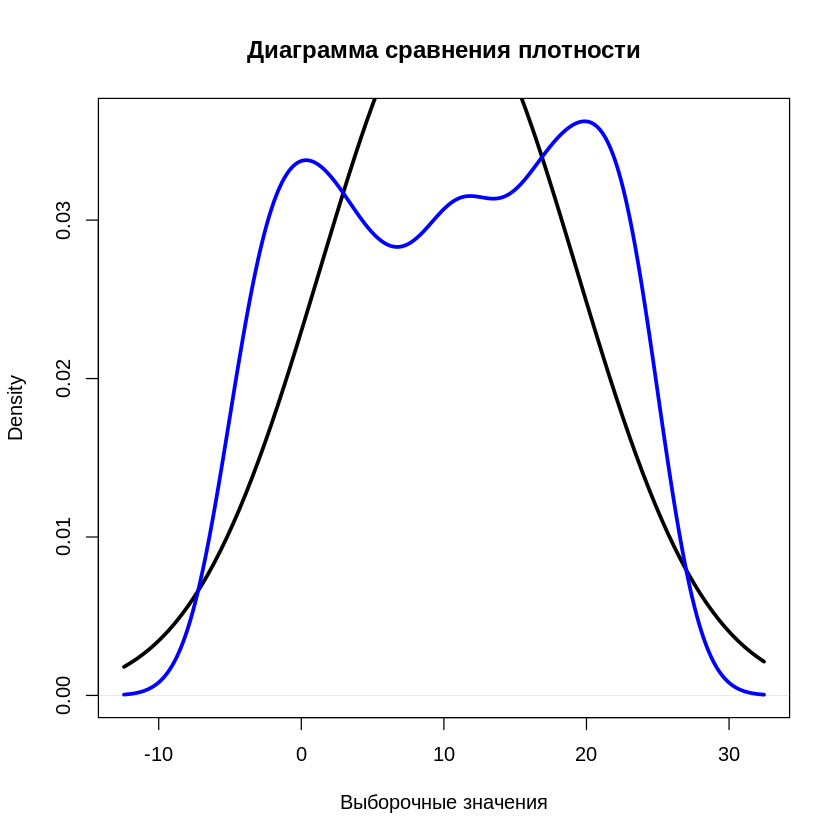

In [18]:
m1 <- mean(sample4$s15)
s1 <- sd(sample4$s15)
x <- seq(m1 - 5*s1, m1 + 5*s1)
plot(density(sample4$s15), col = "green", cex = 1, pch = 2, main = "Диаграмма сравнения плотности", xlab = "Выборочные значения")
curve(dnorm(x, m1, s1), add = TRUE, lwd = 3)
lines(density(sample4$s15),col = "blue", lwd = 3)

График эмпирической плотности, сильно отличается от графика плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может не подходить

Диаграмма сравнения эмпирической плотности относительно полосы, определяемой нормальным распределением

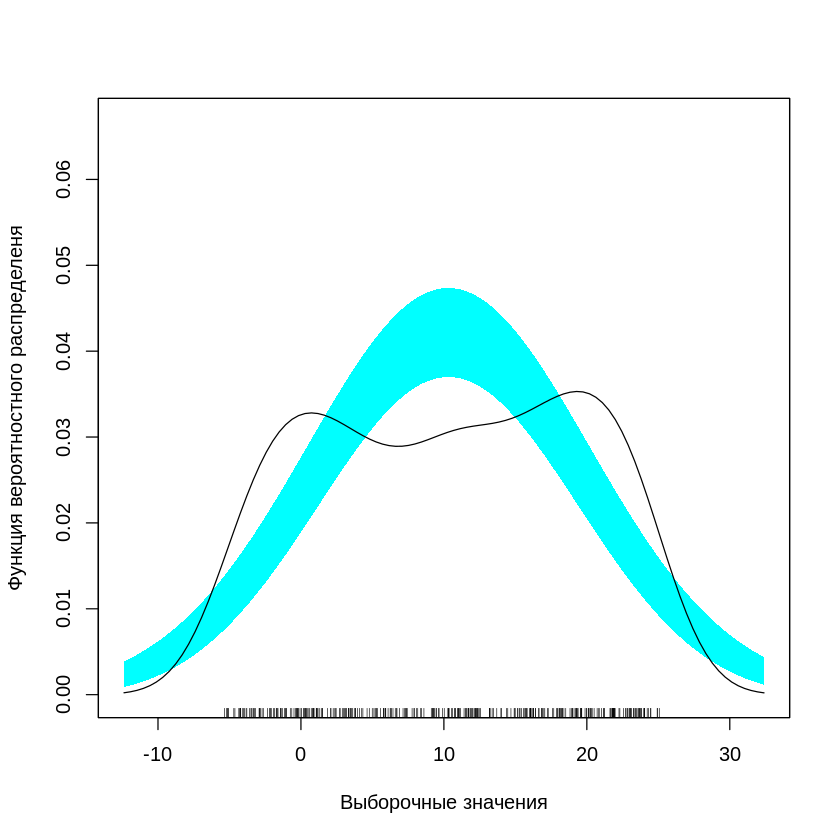

In [19]:
sm.density(sample4$s15, model = "normal", ylab = "Функция вероятностного распределеня", xlab = "Выборочные значения")

График эмпирической плотности расположен за пределами полосы, определяемой нормальным распределением, т.е. график эмпирической плотности отличается от графика плотности нормального распределения, поэтому соответствующее нормальное распределение для описания исследуемого показателя генеральной совокупности может не подходить

**Вывод:** Исходя из графиков можно делать вывод, что соответствующее нормальное распределение может не подходить для описания исследуемого показателя

### Итоги визуализации


На основе анализа диаграмм можем сделать вывод, что для первой, второй и третей генеральной совокупности соответствующее нормальное распределение может подходить для описания исследуемого показателя, а для четвертой может не подходить

##Использование тестов

Проверим с помощью тестов Шапиро-Уилка, Андерса-Дарлинга, Крамера-Майзеса и Колмогорова-Смирнова (с поправками Лилльефорса) гипотезу о нормальности распределения для каждой из четырех генеральных совокупностей

### Первая выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [20]:
shapiro.test(sample1$s15)


	Shapiro-Wilk normality test

data:  sample1$s15
W = 0.99485, p-value = 0.2933


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [21]:
ad.test(sample1$s15)


	Anderson-Darling normality test

data:  sample1$s15
A = 0.44483, p-value = 0.2825


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [22]:
cvm.test(sample1$s15)


	Cramer-von Mises normality test

data:  sample1$s15
W = 0.065183, p-value = 0.3225


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [23]:
lillie.test(sample1$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample1$s15
D = 0.039727, p-value = 0.1971


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

**Вывод:** на основе тестов можно сделать вывод, что для первой выборки гипотеза о нормальности распределения генеральной совокупности не отвергается

### Вторая выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [24]:
shapiro.test(sample2$s15)


	Shapiro-Wilk normality test

data:  sample2$s15
W = 0.99845, p-value = 0.9891


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [25]:
ad.test(sample2$s15)


	Anderson-Darling normality test

data:  sample2$s15
A = 0.17435, p-value = 0.9253


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [26]:
cvm.test(sample2$s15)


	Cramer-von Mises normality test

data:  sample2$s15
W = 0.02959, p-value = 0.8524


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [27]:
lillie.test(sample2$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample2$s15
D = 0.022867, p-value = 0.9276


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

**Вывод:** на основе тестов можно сделать вывод, что для второй выборки гипотеза о нормальности распределения генеральной совокупности не отвергается

### Третья выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [28]:
shapiro.test(sample3$s15)


	Shapiro-Wilk normality test

data:  sample3$s15
W = 0.99346, p-value = 0.1339


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [29]:
ad.test(sample3$s15)


	Anderson-Darling normality test

data:  sample3$s15
A = 0.55328, p-value = 0.1527


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [30]:
cvm.test(sample3$s15)


	Cramer-von Mises normality test

data:  sample3$s15
W = 0.084517, p-value = 0.1805


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [31]:
lillie.test(sample3$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample3$s15
D = 0.037312, p-value = 0.2774


Наблюдаемое значение меньше критического(p-value больше 0.05), гипотиза о нормальности распределения не отвергается

**Вывод:** на основе тестов можно сделать вывод, что для третей выборки гипотеза о нормальности распределения генеральной совокупности не отвергается

### Четвертая выборка

С помощью функции shapiro.test выполним тест Шапиро-Уилка

In [32]:
shapiro.test(sample4$s15)


	Shapiro-Wilk normality test

data:  sample4$s15
W = 0.94169, p-value = 1.673e-10


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается с возможной 5%-й ошибкой

С помощью функции ad.test выполним тест Андерса-Дарлинга

In [33]:
ad.test(sample4$s15)


	Anderson-Darling normality test

data:  sample4$s15
A = 5.5761, p-value = 9.1e-14


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается  с возможной 5%-й ошибкой

С помощью функции cvm.test выполним тест Крамера-Майзеса

In [34]:
cvm.test(sample4$s15)


	Cramer-von Mises normality test

data:  sample4$s15
W = 0.79661, p-value = 1.464e-08


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается с возможной 5%-й ошибкой

С помощью функции lillie.test выполним тест Колмогорова-Смирнова (с поправками Лилльефорса)

In [35]:
lillie.test(sample4$s15)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  sample4$s15
D = 0.080902, p-value = 9.44e-06


Наблюдаемое значение больше критического(p-value меньше 0.05), гипотиза о нормальности распределения отвергается с возможной 5%-й ошибкой

**Вывод:** на основе тестов можно сделать вывод, что для четвертой выборки гипотеза о нормальности распределения генеральной совокупности отвергается

### Итоги исследования

На основе анализа диаграмм сравнения плотности нормального распределения, квантильным графикам нормального распределения и диаграммам сравнения графика эмпирической плотности с графиком плотности нормального распределения и результатов тестов Шапиро-Уилка, Андерса-Дарлинга, Крамера-Майзеса и Колмогорова-Смирнова можем сделать вывод, что для первой, второй и третей выборки гипотеза о нормальности распределения генеральной совокупности не отвергается, а для четвертой отвергается

#Исследование полной однородности

##Визуализация данных

С помощью функций ggplot, geom_violin и geom_point пакета ggplot2 построим скрипичную диаграмму размаха, отобразив данные всех четырех выборок

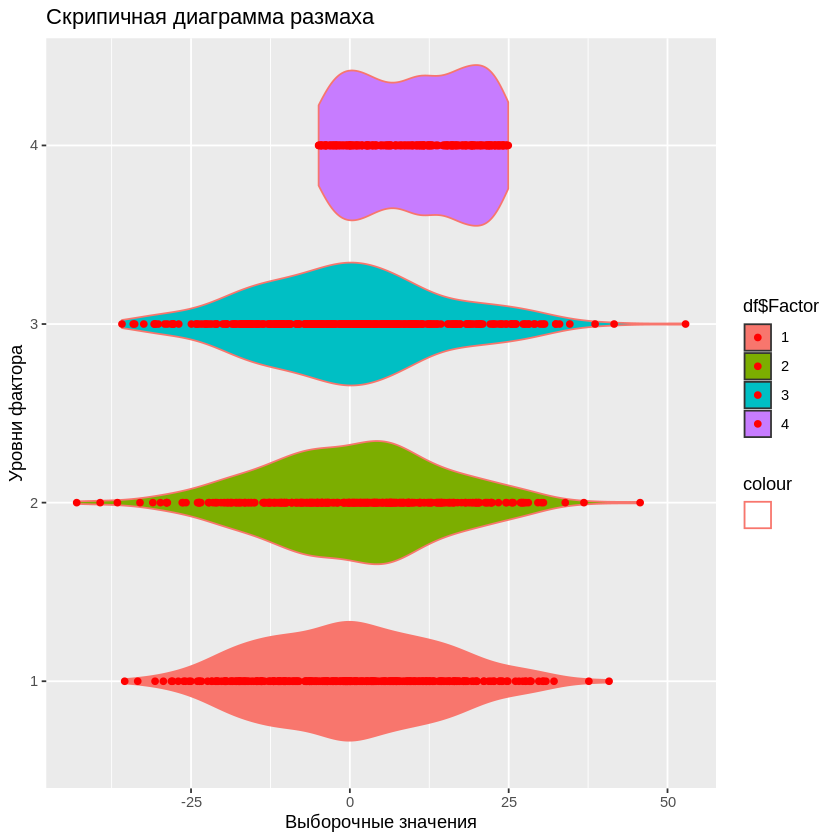

In [36]:
df <- ds
df$Factor <- as.factor(df$Factor)
ggplot(ds, aes(x = df$s15, y = df$Factor, fill = df$Factor, colour = "")) +
  geom_violin() +
  geom_point(col = "red") +
  labs(title = "Скрипичная диаграмма размаха", y = "Уровни фактора", x = "Выборочные значения")

**Вывод:** По скрипичной диаграмме и размаха можно сделать следующий вывод

для пары генеральных совокупностей 1 и 2 можно предположить о наличии полной однородности

для пары генеральных совокупностей 1 и 3 можно предположить о наличии полной однородности

для пары генеральных совокупностей 1 и 4 можно предположить о отсутствии полной однородности

для пары генеральных совокупностей 2 и 3 можно предположить о наличии полной однородности

для пары генеральных совокупностей 2 и 4 можно предположить о отсутствии полной однородности

для пары генеральных совокупностей 3 и 4 можно предположить о отсутствии полной однородности

С помощью функций ggplot, geom_density и facet_wrap пакета ggplot2
построим диаграмму эмпирических плотностей (KDE), отобразив данные всех четырех выборок

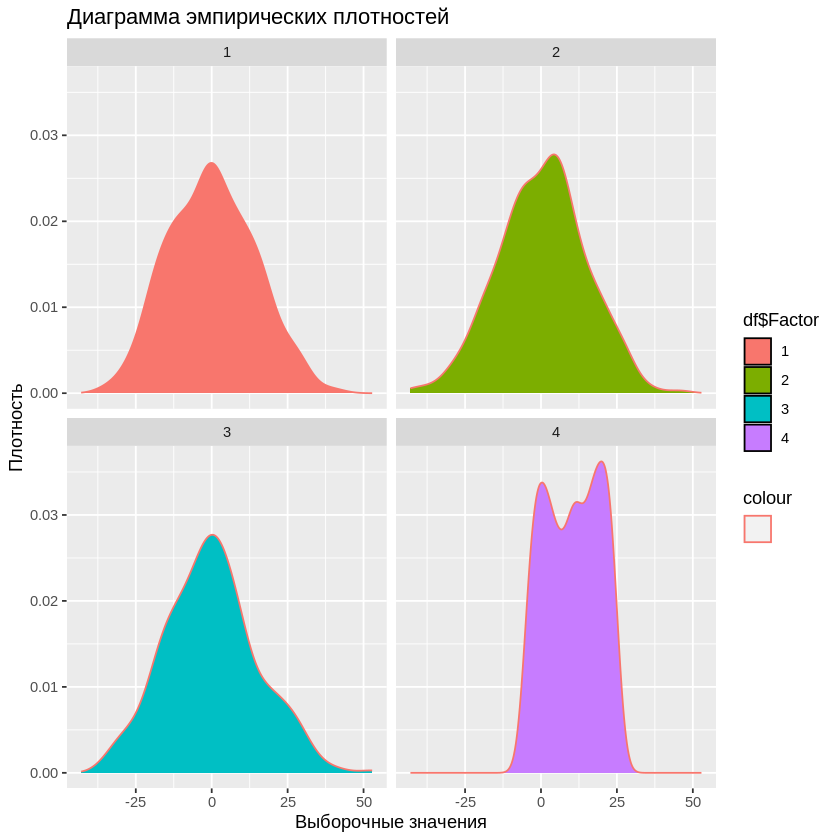

In [44]:
ggplot(ds, aes(x = df$s15, fill = df$Factor, colour = "")) + geom_density() + facet_wrap(df$Factor) +
  labs(title = "Диаграмма эмпирических плотностей", x = "Выборочные значения", y = "Плотность")

**Вывод:** По диаграмме эмпирических плотностей можно сделать следующий вывод

для пары генеральных совокупностей 1 и 2 можно предположить о наличии полной однородности

для пары генеральных совокупностей 1 и 3 можно предположить о наличии полной однородности

для пары генеральных совокупностей 1 и 4 можно предположить о отсутствии полной однородности

для пары генеральных совокупностей 2 и 3 можно предположить о наличии полной однородности

для пары генеральных совокупностей 2 и 4 можно предположить о отсутствии полной однородности

для пары генеральных совокупностей 3 и 4 можно предположить о отсутствии полной однородности

**Итоги визуализации:** На основе результатов полученных диаграмм можно сделать вывод, о полной однородности генеральных совокупностей в следующих парах - первая и вторая; первая и третья; вторая и третья. В парах первая и четвертая, вторая и четвертая, третья и четвертая генеральных совокупностей нет полной однородности

##Использование теста

Проверим гипотезу о полной однородности во всех парах генеральных
совокупностей с помощью двух выборочного теста Колмогорова-Смирнова, используя функцию ks.test

In [38]:
ks.test(sample1$s15, sample2$s15)

Warning message in ks.test.default(sample1$s15, sample2$s15):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample1$s15 and sample2$s15
D = 0.054286, p-value = 0.6809
alternative hypothesis: two-sided


p-значение больше уровня значимости 0,05, следовательно, гипотеза о полной однородности для пары генеральных
совокупностей 1 и 2 не отвергается

In [39]:
ks.test(sample1$s15, sample3$s15)

Warning message in ks.test.default(sample1$s15, sample3$s15):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample1$s15 and sample3$s15
D = 0.04, p-value = 0.9422
alternative hypothesis: two-sided


p-значение больше уровня значимости 0,05, следовательно, гипотеза о полной однородности для пары генеральных
совокупностей 1 и 3 не отвергается

In [40]:
ks.test(sample1$s15, sample4$s15)

Warning message in ks.test.default(sample1$s15, sample4$s15):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample1$s15 and sample4$s15
D = 0.37143, p-value < 2.2e-16
alternative hypothesis: two-sided


p-значение меньше уровня значимости 0,05, следовательно, гипотеза о полной однородности для пары генеральных
совокупностей 1 и 4 отвергается с возможной 5%-й ошибкой

In [41]:
ks.test(sample2$s15, sample3$s15)

Warning message in ks.test.default(sample2$s15, sample3$s15):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample2$s15 and sample3$s15
D = 0.065714, p-value = 0.4365
alternative hypothesis: two-sided


p-значение больше уровня значимости 0,05, следовательно, гипотеза о полной однородности для пары генеральных совокупностей 2 и 3 не отвергается

In [42]:
ks.test(sample2$s15, sample4$s15)

Warning message in ks.test.default(sample2$s15, sample4$s15):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample2$s15 and sample4$s15
D = 0.35714, p-value < 2.2e-16
alternative hypothesis: two-sided


p-значение меньше уровня значимости 0,05, следовательно, гипотеза о полной однородности для пары генеральных совокупностей 2 и 4 отвергается с возможной 5%-й ошибкой

In [43]:
ks.test(sample3$s15, sample4$s15)

Warning message in ks.test.default(sample3$s15, sample4$s15):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample3$s15 and sample4$s15
D = 0.37714, p-value < 2.2e-16
alternative hypothesis: two-sided


p-значение меньше уровня значимости 0,05, следовательно, гипотеза о полной однородности для пары генеральных совокупностей 3 и 4 отвергается с возможной 5%-й ошибкой

##Итоги исследования:

Исследования построенных диаграмм и тестов показали, что гипотеза о полной однородности генеральных совокупностей, представленных соответствующими выборками, не отвергается для пар 1 и 2, 1 и 3, 2 и 3; в парах 1 и 4, 2 и 4, 3 и 4 гипотеза отвергается с возможной 5%-й ошибкой

#Заключение

Цель работы — проверить гипотезу о полной однородности исследуемого признака на парах генеральных совокупностей. С помощью функций ggplot, geom_violin и geom_point пакета ggplot2 построили скрипичную диаграмму размаха, отобразив данные всех четырех выборок. С помощью функций ggplot, geom_density и facet_wrap пакета ggplot2 построили диаграмму эмпирических плотностей (KDE), отобразив данные всех четырех выборок. Проверили гипотезу о полной однородности во всех парах генеральных совокупностей с помощью двух выборочного теста Колмогорова-Смирнова, используя функцию ks.test. Исследования построенных диаграмм и тестов показали, что гипотеза о полной однородности генеральных совокупностей, представленных соответствующими выборками, не отвергается для пар 1 и 2, 1 и 3, 2 и 3; в парах 1 и 4, 2 и 4, 3 и 4 гипотеза отвергается с возможной 5%-й ошибкой